In [58]:
# Gym stuff
import gym
import gym_anytrading
# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C, PPO

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from trader import trader_agent
import cryptomanager as cm

from config import LOG_PATH, MODEL_PATH
from datetime import datetime
import os
test = trader_agent()

1


In [59]:
df = cm.historical_data_df(days_delta=10000)
print(df.dtypes)
df

1995-06-18 00:00:00
date     datetime64[ns, UTC]
Open                 float64
High                 float64
Low                  float64
Close                float64
dtype: object


,date,Open,High,Low,Close
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5
...,...,...,...,...,...
579879,2022-11-03 12:00:00+00:00,20126.0,20128.0,20113.0,20127.0
579880,2022-11-03 12:01:00+00:00,20108.0,20111.0,20108.0,20111.0
579881,2022-11-03 12:02:00+00:00,20112.0,20121.0,20112.0,20119.0
579882,2022-11-03 12:03:00+00:00,20121.0,20121.0,20109.0,20118.0


In [60]:
window_size = 100
lower_bound = len(df) - 250
upper_bound = len(df)
# df = pd.read_csv("data/gmedata.csv")
env = gym.make('stocks-v0', df=df, frame_bound=(lower_bound,upper_bound), window_size=window_size)
df

,date,Open,High,Low,Close
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5
...,...,...,...,...,...
579879,2022-11-03 12:00:00+00:00,20126.0,20128.0,20113.0,20127.0
579880,2022-11-03 12:01:00+00:00,20108.0,20111.0,20108.0,20111.0
579881,2022-11-03 12:02:00+00:00,20112.0,20121.0,20112.0,20119.0
579882,2022-11-03 12:03:00+00:00,20121.0,20121.0,20109.0,20118.0


info {'total_reward': -89.0, 'total_profit': 0.379682842030379, 'position': 0}


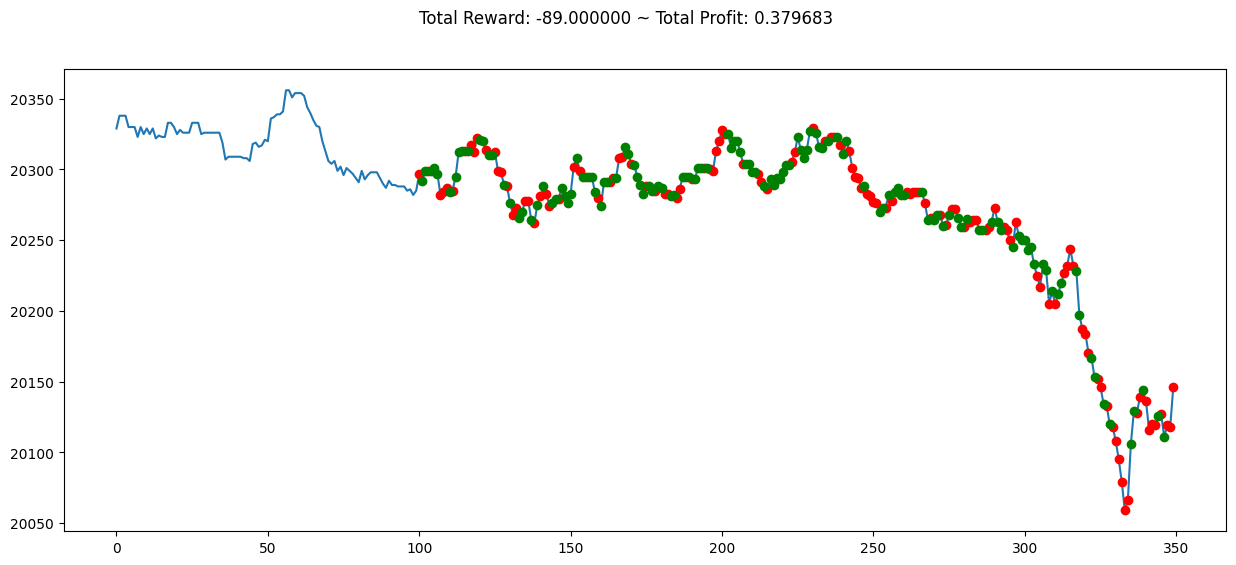

In [61]:
# Examining the model

state = env.reset()
while True: 
    # add a bit of randomness
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [62]:
# !pip install finta

In [63]:
from gym_anytrading.envs import StocksEnv, ForexEnv
from finta import TA

In [64]:
# df['OBV'] = TA.OBV(df)
df['EMA'] = TA.EMA(df, 200)
df['RSI'] = TA.RSI(df)
df.fillna(0, inplace=True)
df = df.join(TA.MACD(df))
df

,date,Open,High,Low,Close,EMA,RSI,MACD,SIGNAL
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0,7314.000000,0.000000,0.000000,0.000000
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5,7207.218750,0.000000,-4.767628,-2.648682
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0,7171.121178,0.000000,-6.121420,-4.071935
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5,7157.767900,9.107921,-5.919194,-4.697701
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5,7278.289003,79.058101,19.384455,2.466196
...,...,...,...,...,...,...,...,...,...
579879,2022-11-03 12:00:00+00:00,20126.0,20128.0,20113.0,20127.0,20242.862934,45.676677,-12.949653,-18.847853
579880,2022-11-03 12:01:00+00:00,20108.0,20111.0,20108.0,20111.0,20241.550865,40.438090,-12.984970,-17.675276
579881,2022-11-03 12:02:00+00:00,20112.0,20121.0,20112.0,20119.0,20240.331453,43.902414,-12.226486,-16.585518
579882,2022-11-03 12:03:00+00:00,20121.0,20121.0,20109.0,20118.0,20239.114225,43.561342,-11.572671,-15.582949


In [65]:
df.head(15)

,date,Open,High,Low,Close,EMA,RSI,MACD,SIGNAL
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0,7314.000000,0.000000,0.000000,0.000000
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5,7207.218750,0.000000,-4.767628,-2.648682
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0,7171.121178,0.000000,-6.121420,-4.071935
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5,7157.767900,9.107921,-5.919194,-4.697701
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5,7278.289003,79.058101,19.384455,2.466196
5,2020-04-29 03:18:00+00:00,7836.0,7836.0,7836.0,7836.0,7373.580045,81.219889,37.972569,12.090397
6,2020-04-30 12:48:00+00:00,8829.0,8829.0,8829.0,8829.0,7587.786410,91.696109,94.223816,32.876174
7,2020-04-30 12:56:00+00:00,8734.5,8734.5,8734.5,8734.5,7736.192393,86.737276,125.932608,55.239385
8,2020-05-01 00:00:00+00:00,8653.0,8653.0,8653.0,8653.0,7842.181898,82.589058,141.930720,75.265514
9,2020-05-01 05:31:00+00:00,8826.5,8826.5,8826.5,8826.5,7945.101892,84.309425,160.151292,94.284856


In [66]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Close','EMA',"MACD","SIGNAL", 'RSI']].to_numpy()[start:end]
    return prices, signal_features

In [67]:
from enum import Enum


# class Actions(Enum):
#     Sell = 0
#     Buy = 1
#     # Hold = 2

from gym import spaces
class Cypto_Env(StocksEnv):
    _process_data = add_signals
    # StocksEnv.action_space = spaces.Discrete(len(Actions))

    

    
env2 = Cypto_Env(df=df, window_size=window_size, frame_bound=(lower_bound,upper_bound))
df.head()

,date,Open,High,Low,Close,EMA,RSI,MACD,SIGNAL
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0,7314.000000,0.000000,0.000000,0.000000
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5,7207.218750,0.000000,-4.767628,-2.648682
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0,7171.121178,0.000000,-6.121420,-4.071935
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5,7157.767900,9.107921,-5.919194,-4.697701
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5,7278.289003,79.058101,19.384455,2.466196


In [68]:
env2.signal_features

array([[ 2.03290000e+04,  2.03321938e+04, -8.28050779e+00,
        -5.76229457e+00,  3.40699556e+01],
       [ 2.03380000e+04,  2.03322516e+04, -7.89710458e+00,
        -6.18925657e+00,  4.21690887e+01],
       [ 2.03380000e+04,  2.03323088e+04, -7.50672195e+00,
        -6.45274965e+00,  4.21690887e+01],
       ...,
       [ 2.01190000e+04,  2.02403315e+04, -1.22264860e+01,
        -1.65855184e+01,  4.39024141e+01],
       [ 2.01180000e+04,  2.02391142e+04, -1.15726713e+01,
        -1.55829490e+01,  4.35613423e+01],
       [ 2.01460000e+04,  2.02381877e+04, -8.69492282e+00,
        -1.42053437e+01,  5.42733231e+01]])

In [69]:
df.head()

,date,Open,High,Low,Close,EMA,RSI,MACD,SIGNAL
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0,7314.000000,0.000000,0.000000,0.000000
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5,7207.218750,0.000000,-4.767628,-2.648682
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0,7171.121178,0.000000,-6.121420,-4.071935
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5,7157.767900,9.107921,-5.919194,-4.697701
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5,7278.289003,79.058101,19.384455,2.466196


In [70]:

 
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [78]:
from config import LOG_PATH, MODEL_PATH
from datetime import datetime
import os
 
model = A2C('MlpPolicy', env, verbose=1, tensorboard_log=LOG_PATH, device="cuda") 


# model = A2C.load(path=os.path.join("data","model","2022-01-11-19-26-1.zip"),env=env, device="auto")
name = str(datetime.now().strftime("%Y-%d-%m-%H-%M") )
print(name)
episodes = 1
step_count = 50000
# for i in range (episodes):
#     model.learn(total_timesteps=step_count, tb_log_name=f"A2C-{name}"
#     )
# #     model.save(f"{os.path.join(MODEL_PATH , name)}-{i + 1}.zip")

Using cpu device
2022-03-11-09-31


In [72]:
from datetime import timedelta
from collections import deque 
from trader import trader_agent
import time
import os
trade_me = trader_agent()
prev_min = 0
from IPython.display import clear_output
print(len(df)-lower_bound,len(df))

1
250 579884


In [73]:
obs = env.reset()
env2.frame_bound

test = env2.signal_features[window_size - lower_bound:upper_bound]
last_test = test[-window_size:]
last_test = last_test[np.newaxis, ...]


action = model.predict(last_test)

print(action)
print(obs)
print(last_test)
print(obs == last_test)
# print(test[0:5])

(array([0], dtype=int64), None)
[[[ 2.03380000e+04  2.03322516e+04 -7.89710458e+00 -6.18925657e+00
    4.21690887e+01]
  [ 2.03380000e+04  2.03323088e+04 -7.50672195e+00 -6.45274965e+00
    4.21690887e+01]
  [ 2.03380000e+04  2.03323654e+04 -7.11531993e+00 -6.58526371e+00
    4.21690887e+01]
  [ 2.03300000e+04  2.03323419e+04 -7.36575630e+00 -6.74136222e+00
    3.71082020e+01]
  [ 2.03300000e+04  2.03323186e+04 -7.47802688e+00 -6.88869516e+00
    3.71082020e+01]
  [ 2.03300000e+04  2.03322955e+04 -7.48076849e+00 -7.00710982e+00
    3.71082020e+01]
  [ 2.03230000e+04  2.03322030e+04 -7.95607010e+00 -7.19690188e+00
    3.28055010e+01]
  [ 2.03300000e+04  2.03321811e+04 -7.67938539e+00 -7.29339858e+00
    4.02646206e+01]
  [ 2.03250000e+04  2.03321097e+04 -7.77395565e+00 -7.38950999e+00
    3.70968916e+01]
  [ 2.03290000e+04  2.03320787e+04 -7.44036875e+00 -7.39968174e+00
    4.10898019e+01]
  [ 2.03250000e+04  2.03320083e+04 -7.41330928e+00 -7.40240725e+00
    3.84606326e+01]
  [ 2.03290

In [74]:
# # model.load(os.path.join(MODEL_PATH, "2022-01-11-21-49-18.zip") , env = env)
# env = Cypto_Env(df=df, window_size=window_size, frame_bound=(len(df)-80,len(df)))
# obs = env.reset()
# pos_count = deque(maxlen=60)

# env.trade_fee_bid_percent = 0 # unit
# env.trade_fee_ask_percent = 0 # unit
# while True: 
#     try:
#         obs = obs[np.newaxis, ...]
#         action, _states = model.predict(obs)
#         obs, rewards, done, info = env.step(action)
#         cur_min = datetime.now().minute
#         print(action)
#         clear_output()
#         if done:
#             clear_output()
#             reward = env._total_reward

#             pos_count.append(action)
#             print(pos_count)
#             next_df = cm.historical_data_df()
#             next_df = next_df.loc[-100:]
#             next_df['EMA'] = TA.EMA(next_df, 200)
#             prev_min = cur_min
#             next_df['RSI'] = TA.RSI(next_df)
#             next_df.fillna(0, inplace=True)
#             next_df = next_df.join(TA.MACD(next_df))
#             df = pd.concat([df, next_df])
            
#             print(action[0])

#             if action == 1 or action[0] == 1:
#                 trade_me.buy_position_at_market("BTC/USD")
#                 print("b") 
#                 print(df["Low"].tail(1))
#             if action == 0 or action[0] == 0:
#                 trade_me.sell_position_market("BTCUSD")
#                 print("s")
#                 print(df["Low"].tail(1))
#             plt.figure(figsize=(10,6))
#             plt.cla()
#             env.render_all()
#             plt.show()
#             print("info", info)
#             obs = obs[np.newaxis, ...]
#             action, _states = model.predict(obs)
#             obs = env.reset()
#             env.df = df
#             env.frame_bound=(len(df)-lower_bound,len(df))
#             td = timedelta(seconds= 60 - datetime.now().second) 

#             print("waiting for the remainder of the minute")
#             time.sleep(td.total_seconds())
#             env._total_reward = reward
#     except Exception as e:
#         print(e)
#         break


# cur_min = datetime.now().minute

# td = timedelta(seconds= 60 - datetime.now().second) 
# # while True:
# print(td.total_seconds())
#     # if cur_min > prev_min:
#     #     prev_min = cur_min

In [75]:
# plt.figure(figsize=(15,6))
# plt.cla()
# env.render_all()
# plt.show()
# model = model.load(os.path.join(MODEL_PATH, "1667475168.276972.zip"))

In [79]:
past_trades = deque(maxlen=60)
prev_min = 0
test_env = Cypto_Env(df=df, window_size=window_size, frame_bound=(lower_bound,upper_bound))
while True:
    cur_min = datetime.now().minute
    try:
        if cur_min > prev_min:
            prev_min = cur_min
        # td = timedelta(seconds= 60 - datetime.now().second) 
        # time.sleep(td.total_seconds())
        next_df = cm.historical_data_df()
        next_df = next_df.loc[-100:]
        next_df['EMA'] = TA.EMA(next_df, 200)
        next_df['RSI'] = TA.RSI(next_df)
        next_df.fillna(0, inplace=True)
        next_df = next_df.join(TA.MACD(next_df))
        df = pd.concat([df, next_df])
        test_env.df = df
        obs = test_env.signal_features[window_size - lower_bound:upper_bound]
        obs = obs[-window_size:]
        action = model.predict(obs)
        if action == 1 or action[0] == 1:
            trade_me.buy_position_at_market("BTC/USD")
            print("b") 
            print(df["Low"].tail(1))
            past_trades.append(action[0])
        if action == 0 or action[0] == 0:
            trade_me.sell_position_market("BTCUSD")
            print("s")
            print(df["Low"].tail(1))
            past_trades.append(action[0])
        for episode in range(episodes):
            model = model.learn(total_timesteps=step_count, tb_log_name= f"A2C-{str(time.time())}")
            model.save(os.path.join(MODEL_PATH, str(time.time()) + ".zip"))
            clear_output()
            print("past trades: ", list(past_trades))
    except Exception as e:
        if e == KeyboardInterrupt:
            trade_me.sell_position_market("BTCUSD")
            model.save(os.path.join(MODEL_PATH, str(time.time()) + ".zip"))
            model.save(os.path.join(MODEL_PATH, "latest.zip"))


past trades:  [(array(1, dtype=int64), None), (array(1, dtype=int64), None), (array(1, dtype=int64), None), (array(1, dtype=int64), None), (array(1, dtype=int64), None), (array(1, dtype=int64), None), (array(1, dtype=int64), None), (array(1, dtype=int64), None)]
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
buying  BTC/USD
b

In [ ]:
model.save(os.path.join(MODEL_PATH, str(time.time()) + ".zip"))